<a href="https://colab.research.google.com/github/Nickhill28/AsknBid/blob/master/HandsOn_Technical_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/prices-split-adjusted.csv',parse_dates=True)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      1
volume    1
dtype: int64

In [ ]:
df.shape[0]

34257

In [ ]:
df.describe()

,open,close,low,high,volume
count,34257.000000,34257.000000,34257.000000,34256.000000,3.425600e+04
mean,40.139776,40.179275,39.704871,40.572212,7.260709e+06
std,33.783371,33.796840,33.423174,34.131228,1.736257e+07
min,3.680000,3.680000,3.650000,3.740000,0.000000e+00
25%,21.680001,21.705000,21.430000,21.929500,1.481550e+06
50%,32.490002,32.540001,32.160000,32.869999,3.132350e+06
75%,48.349998,48.430000,47.810001,48.939999,6.663425e+06
max,385.089996,388.010010,378.809998,393.920013,5.890618e+08


In [ ]:
import copy
data=df
tech_indi1=copy.deepcopy(data)
tech_indi2=copy.deepcopy(data)

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

  Using cached https://files.pythonhosted.org/packages/d7/15/ebf1a6ebcf7580dc53e342979c7425affc38ef272bc10a7f4565ee87b394/TA-Lib-0.4.18.tar.gz
  Created wheel for ta-lib: filename=TA_Lib-0.4.18-cp36-cp36m-linux_x86_64.whl size=1531845 sha256=6d40888bb14fbce0ac2e47b2f60fc0101284dd869f53d68f1fdebaa41cb01b9b
  Stored in directory: /root/.cache/pip/wheels/11/cc/88/20d

In [ ]:
tech_indi1['daily return']=tech_indi1.close.pct_change().fillna(0)
tech_indi1['cum daily return'] = (1 + tech_indi1['daily return']).cumprod()

tech_indi1['hi-lo']= tech_indi1.high - df.low
tech_indi1['cl-op']= tech_indi1.close - tech_indi1.open

tech_indi1['10 day MA']=tech_indi1.close.shift(1).rolling(window=10).mean().fillna(0)
tech_indi1['50 day MA']=tech_indi1.close.shift(1).rolling(window=50).mean().fillna(0)
tech_indi1['200 day MA']=tech_indi1.close.shift(1).rolling(window=200).mean().fillna(0)

import talib
tech_indi1['rsi']= talib.RSI(tech_indi1.close.values , timeperiod = 14)
tech_indi1['william R%']= talib.WILLR(tech_indi1.high.values , tech_indi1.low.values , tech_indi1.close.values ,14)

tech_indi1['7 day MA']=tech_indi1.close.rolling(window=7).mean().fillna(0)
tech_indi1['21 day MA']=tech_indi1.close.rolling(window=21).mean().fillna(0)


tech_indi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              34257 non-null  object 
 1   symbol            34257 non-null  object 
 2   open              34257 non-null  float64
 3   close             34257 non-null  float64
 4   low               34257 non-null  float64
 5   high              34256 non-null  float64
 6   volume            34256 non-null  float64
 7   daily return      34257 non-null  float64
 8   cum daily return  34257 non-null  float64
 9   hi-lo             34256 non-null  float64
 10  cl-op             34257 non-null  float64
 11  10 day MA         34257 non-null  float64
 12  50 day MA         34257 non-null  float64
 13  200 day MA        34257 non-null  float64
 14  rsi               34243 non-null  float64
 15  william R%        34244 non-null  float64
 16  7 day MA          34257 non-null  float6

In [ ]:
tech_indi1.describe()

,open,close,low,high,volume,daily return,cum daily return,hi-lo,cl-op,10 day MA,50 day MA,200 day MA,rsi,william R%,7 day MA,21 day MA
count,34257.000000,34257.000000,34257.000000,34256.000000,3.425600e+04,34257.000000,34257.000000,34256.000000,34257.000000,34257.000000,34257.000000,34257.000000,34243.000000,34244.000000,34257.000000,34257.000000
mean,40.139776,40.179275,39.704871,40.572212,7.260709e+06,0.448965,0.319289,0.867262,0.039499,40.158124,40.067812,39.707368,49.996586,-64.322868,40.165711,40.134616
std,33.783371,33.796840,33.423174,34.131228,1.736257e+07,1.564317,0.268570,0.930146,0.736800,13.100580,8.446979,6.296288,3.966480,29.590602,14.793790,10.445315
min,3.680000,3.680000,3.650000,3.740000,0.000000e+00,-0.928149,0.029243,0.000000,-22.919998,0.000000,0.000000,0.000000,4.469560,-100.000000,0.000000,0.000000
25%,21.680001,21.705000,21.430000,21.929500,1.481550e+06,-0.414755,0.172481,0.395001,-0.200001,32.649979,35.830992,37.602417,47.535017,-88.624536,31.481786,34.129047
50%,32.490002,32.540001,32.160000,32.869999,3.132350e+06,0.001347,0.258582,0.629997,0.030000,36.937551,39.030684,39.503993,49.104920,-71.146583,36.670000,37.945595
75%,48.349998,48.430000,47.810001,48.939999,6.663425e+06,0.755990,0.384854,1.020000,0.289999,44.009000,42.746370,41.420674,51.511469,-46.824567,44.569476,43.580750
max,385.089996,388.010010,378.809998,393.920013,5.890618e+08,15.537509,3.083360,33.119995,13.950012,131.099001,126.922999,123.992650,75.125097,-0.000000,131.797145,129.604284


In [ ]:
exp1 = tech_indi1.close.ewm(span=12, adjust=False).mean()
exp2 = tech_indi1.close.ewm(span=26, adjust=False).mean()
tech_indi1['macd'] = exp1-exp2


In [ ]:
window= 21
no_std =2
rolling_mean = tech_indi1.close.rolling(window).mean()
rolling_std = tech_indi1.close.rolling(window).std()

tech_indi1['bb_high'] = (rolling_mean + (rolling_std*no_std)).fillna(0)
tech_indi1['bb_low'] = (rolling_mean - (rolling_std*no_std)).fillna(0)

tech_indi1['ema'] = tech_indi1.close.ewm(com=0.5).mean()

tech_indi1['momentum'] = tech_indi1.close - 1

tech_indi1.head(20)

,date,symbol,open,close,low,high,volume,daily return,cum daily return,hi-lo,cl-op,10 day MA,50 day MA,200 day MA,rsi,william R%,7 day MA,21 day MA,macd,bb_high,bb_low,ema,momentum
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,0.000000,1.000000,3.940002,2.409996,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,0.000000,0.0,0.0,125.839996,124.839996
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-0.046567,0.953433,5.599999,-5.259995,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,-0.467464,0.0,0.0,121.445001,118.980003
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-0.041924,0.913462,4.809998,-1.430000,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,-1.229637,0.0,0.0,116.948460,113.949997
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,0.014528,0.926732,3.940002,1.140000,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,-1.679549,0.0,0.0,116.726751,115.620003
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-0.014149,0.913621,3.240006,-2.040001,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,-2.144528,0.0,0.0,115.550745,113.970001
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,0.005045,0.918230,1.559998,0.040001,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,-2.438120,0.0,0.0,115.550250,114.550003
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,-0.023367,0.896774,4.480004,-3.610001,0.000000,0.0,0.0,NaN,NaN,117.251429,0.0,-2.855743,0.0,0.0,113.749258,111.849998
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,0.013558,0.908932,4.979996,0.869995,0.000000,0.0,0.0,NaN,NaN,115.614286,0.0,-3.028345,0.0,0.0,114.169815,113.379997
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,-0.016174,0.894231,2.959999,-0.800003,0.000000,0.0,0.0,NaN,NaN,114.550000,0.0,-3.276642,0.0,0.0,113.076549,111.529999
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,-0.019106,0.877146,6.000000,-3.280007,0.000000,0.0,0.0,NaN,NaN,113.897143,0.0,-3.605346,0.0,0.0,111.278817,109.379997


In [ ]:
tech_indi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              34257 non-null  object 
 1   symbol            34257 non-null  object 
 2   open              34257 non-null  float64
 3   close             34257 non-null  float64
 4   low               34257 non-null  float64
 5   high              34256 non-null  float64
 6   volume            34256 non-null  float64
 7   daily return      34257 non-null  float64
 8   cum daily return  34257 non-null  float64
 9   hi-lo             34256 non-null  float64
 10  cl-op             34257 non-null  float64
 11  10 day MA         34257 non-null  float64
 12  50 day MA         34257 non-null  float64
 13  200 day MA        34257 non-null  float64
 14  rsi               34243 non-null  float64
 15  william R%        34244 non-null  float64
 16  7 day MA          34257 non-null  float6

In [ ]:
import matplotlib.pyplot as plt

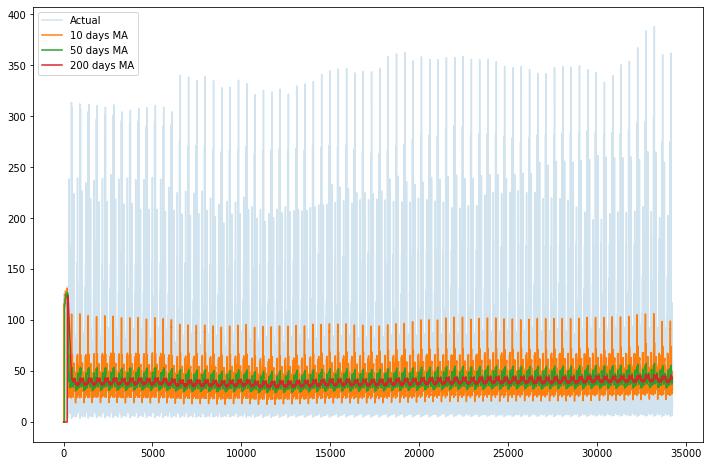

In [130]:
plt.figure(figsize=(12,8))
plt.plot(tech_indi1['close'],label='Actual', alpha=0.2)
plt.plot(tech_indi1['10 day MA'],label='10 days MA')
plt.plot(tech_indi1['50 day MA'],label='50 days MA')
plt.plot(tech_indi1['200 day MA'],label='200 days MA')

plt.legend(loc='best')

In [ ]:
def stok(df, n): 
    tech_indi2[ 'stok'] = ((tech_indi2['close'] - tech_indi2['low'].rolling(window=n, center=False).mean()) / (tech_indi2['high'].rolling(window=n, center=False).max() - tech_indi2['low'].rolling(window=n, center=False) .min())) * 100
    tech_indi2['stod'] = tech_indi2['stok'].rolling(window = 3, center=False).mean() 
stok(tech_indi2, 4) 
tech_indi2 = tech_indi2.fillna(0) 
tech_indi2.tail()

,date,symbol,open,close,low,high,volume,stok,stod
34252,2010-04-19,NFX,52.310001,52.610001,51.299999,52.730000,1285400.0,29.119231,5.745247
34253,2010-04-19,NI,6.392928,6.440079,6.357564,6.447937,9150500.0,-51.281292,-24.724655
34254,2010-04-19,NKE,18.737499,18.895001,18.562500,18.950001,8790400.0,-6.719696,-9.627252
34255,2010-04-19,NOC,59.342048,60.010640,59.269766,60.082917,1492300.0,48.651486,-3.116501
34256,2010-04-19,NOV,38.016231,38.358878,37.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
tech_indi2['ROC'] = ((tech_indi2['close'] - tech_indi2['close'].shift(12)) / (tech_indi2['close'].shift(12)))*100
tech_indi2 = tech_indi2.fillna(0)

tech_indi2['momentum'] = tech_indi2['close'] - tech_indi2['close'].shift(4)
tech_indi=tech_indi2.fillna(0)

md = 19 * ((tech_indi2['high']+tech_indi2['low']+tech_indi2['close']) / 3) / 400
tech_indi2['cci'] = 4000/3


tech_indi2['ema'] = tech_indi2['close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean().fillna(0)

tech_indi2['tema'] = (3 * tech_indi2['ema'] - 3 * tech_indi2['ema'] * tech_indi2['ema']) + (tech_indi2['ema']**3)



In [ ]:
#turing line
tech_indi2['turing line'] = ((tech_indi2['high'].rolling(window=9,center=False).max() + tech_indi2['low'].rolling(window=9,center=False).min())/2)

#standard line
tech_indi2['standard line']= ((tech_indi2['high'].rolling(window=26,center=False).max() + tech_indi2['low'].rolling(window=26,center=False).min())/2)

#leading span1
tech_indi2['ichimoku_span1'] = ((tech_indi2['turing line'] + tech_indi2['standard line'])/2).shift(26)

#leading span2
tech_indi2['ichimoku_span2'] = ((tech_indi2['high'].rolling(window=52,center=False).max() + tech_indi2['low'].rolling(window=52,center=False).min())/2).shift(26)

#most current closing price plotted 22 time periods behind
tech_indi2['chikou_span'] = tech_indi2['close'].shift(-22)

In [ ]:
import numpy as np


In [ ]:
close_fit = np.fft.fft(np.asarray(df.close.tolist()))
fft_df = pd.DataFrame({'fft':close_fit})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


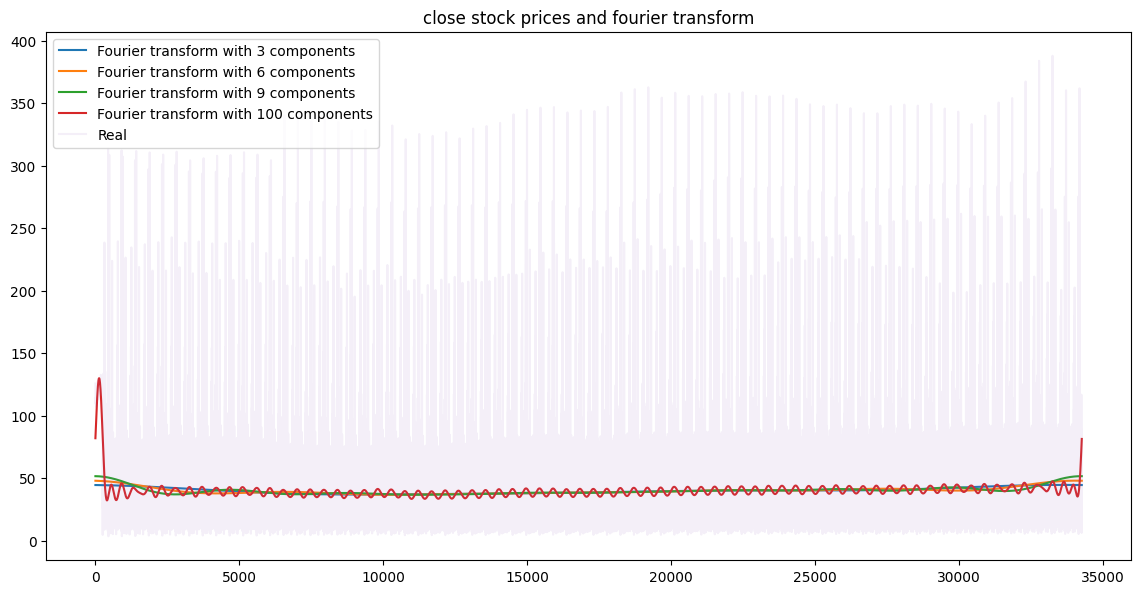

In [128]:
plt.figure(figsize=(14,7),dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3,6,9,100]:
    fft_list_m10 = np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(tech_indi2.close, label='Real',alpha = 0.1)
plt.title('close stock prices and fourier transform')
plt.legend()
plt.show()


In [ ]:
tech_indi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            34257 non-null  object 
 1   symbol          34257 non-null  object 
 2   open            34257 non-null  float64
 3   close           34257 non-null  float64
 4   low             34257 non-null  float64
 5   high            34257 non-null  float64
 6   volume          34257 non-null  float64
 7   stok            34257 non-null  float64
 8   stod            34257 non-null  float64
 9   ROC             34257 non-null  float64
 10  momentum        34253 non-null  float64
 11  cci             34257 non-null  float64
 12  ema             34257 non-null  float64
 13  tema            34257 non-null  float64
 14  turing line     34249 non-null  float64
 15  standard line   34232 non-null  float64
 16  ichimoku_span1  34206 non-null  float64
 17  ichimoku_span2  34180 non-null 

In [ ]:
tech_indi1.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume',
       'daily return', 'cum daily return', 'hi-lo', 'cl-op', '10 day MA',
       '50 day MA', '200 day MA', 'rsi', 'william R%', '7 day MA', '21 day MA',
       'macd', 'bb_high', 'bb_low', 'ema', 'momentum'],
      dtype='object')

In [112]:
a=copy.deepcopy(tech_indi1)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              34257 non-null  object 
 1   symbol            34257 non-null  object 
 2   open              34257 non-null  float64
 3   close             34257 non-null  float64
 4   low               34257 non-null  float64
 5   high              34256 non-null  float64
 6   volume            34256 non-null  float64
 7   daily return      34257 non-null  float64
 8   cum daily return  34257 non-null  float64
 9   hi-lo             34256 non-null  float64
 10  cl-op             34257 non-null  float64
 11  10 day MA         34257 non-null  float64
 12  50 day MA         34257 non-null  float64
 13  200 day MA        34257 non-null  float64
 14  rsi               34243 non-null  float64
 15  william R%        34244 non-null  float64
 16  7 day MA          34257 non-null  float6

In [114]:
#visualizing technical indicators: MACD BollingerBandsHigh BollingerBandsLow EMA momentum 

print(a.iloc[:,-5:])

           macd    bb_high     bb_low         ema    momentum
0      0.000000   0.000000   0.000000  125.839996  124.839996
1     -0.467464   0.000000   0.000000  121.445001  118.980003
2     -1.229637   0.000000   0.000000  116.948460  113.949997
3     -1.679549   0.000000   0.000000  116.726751  115.620003
4     -2.144528   0.000000   0.000000  115.550745  113.970001
...         ...        ...        ...         ...         ...
34252 -1.177126  98.178984 -14.062452   43.154246   51.610001
34253 -3.832350  98.980465 -16.607734   18.678134    5.440079
34254 -4.875425  93.176311 -16.994533   18.822712   17.895001
34255 -2.357209  94.556833 -13.318327   46.281330   59.010640
34256 -2.084590  94.645610 -11.747211   40.999696   37.358878

[34257 rows x 5 columns]


In [116]:
#visualizing technical indicators: 10dayMeanAverage 50dayMeanAverage 200dayMeanAverage RSI WILLIAM R%

print(a.iloc[:,11:16])

       10 day MA  50 day MA  200 day MA        rsi  william R%
0       0.000000   0.000000    0.000000        NaN         NaN
1       0.000000   0.000000    0.000000        NaN         NaN
2       0.000000   0.000000    0.000000        NaN         NaN
3       0.000000   0.000000    0.000000        NaN         NaN
4       0.000000   0.000000    0.000000        NaN         NaN
...          ...        ...         ...        ...         ...
34252  45.824684  40.608521   43.220721  51.336771  -60.533958
34253  42.675685  41.454921   43.348421  45.982688  -99.925577
34254  31.627693  39.680723   43.290288  47.571209  -88.692017
34255  32.438193  39.436223   43.244813  52.533662  -51.608284
34256  33.251001  39.904836   43.363866  49.857409  -71.136818

[34257 rows x 5 columns]


In [117]:
b=copy.deepcopy(tech_indi2)
b.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34257 entries, 0 to 34256
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            34257 non-null  object 
 1   symbol          34257 non-null  object 
 2   open            34257 non-null  float64
 3   close           34257 non-null  float64
 4   low             34257 non-null  float64
 5   high            34257 non-null  float64
 6   volume          34257 non-null  float64
 7   stok            34257 non-null  float64
 8   stod            34257 non-null  float64
 9   ROC             34257 non-null  float64
 10  momentum        34253 non-null  float64
 11  cci             34257 non-null  float64
 12  ema             34257 non-null  float64
 13  tema            34257 non-null  float64
 14  turing line     34249 non-null  float64
 15  standard line   34232 non-null  float64
 16  ichimoku_span1  34206 non-null  float64
 17  ichimoku_span2  34180 non-null 

In [118]:
#visualizing technical indicators: ROC momentum CCI EMA TEMA

print(b.iloc[:,9:14])

              ROC   momentum          cci         ema          tema
0        0.000000        NaN  1333.333333  125.839996  1.945635e+06
1        0.000000        NaN  1333.333333  121.933334  1.768635e+06
2        0.000000        NaN  1333.333333  117.942856  1.599268e+06
3        0.000000        NaN  1333.333333  117.237334  1.570497e+06
4        0.000000 -10.869995  1333.333333  116.067098  1.523540e+06
...           ...        ...          ...         ...           ...
34252   69.490977  31.030001  1333.333333   40.727517  6.270197e+04
34253  -78.442441 -41.969921  1333.333333   23.583798  1.151937e+04
34254  -77.532698 -33.325001  1333.333333   21.239399  8.291732e+03
34255  -48.673759  47.896354  1333.333333   40.625020  6.221791e+04
34256  255.503969 -14.251123  1333.333333   39.491949  5.703183e+04

[34257 rows x 5 columns]


In [120]:
#visualizing technical indicators: TuringLine StandardLine IchimokuClouds Chikou/Lagging span

print(b.iloc[:,-5:])

       turing line  standard line  ichimoku_span1  ichimoku_span2  chikou_span
0              NaN            NaN             NaN             NaN   114.019997
1              NaN            NaN             NaN             NaN   111.160004
2              NaN            NaN             NaN             NaN   110.650002
3              NaN            NaN             NaN             NaN   107.519997
4              NaN            NaN             NaN             NaN   107.129997
...            ...            ...             ...             ...          ...
34252    31.605000      62.030001       47.531217      188.790001          NaN
34253    29.543782      61.793784       47.531217      188.790001          NaN
34254    29.543782      61.793784       50.477500      188.790001          NaN
34255    33.220241      61.793784       48.385000       51.619999          NaN
34256    33.220241      61.793784       47.037501       51.619999          NaN

[34257 rows x 5 columns]


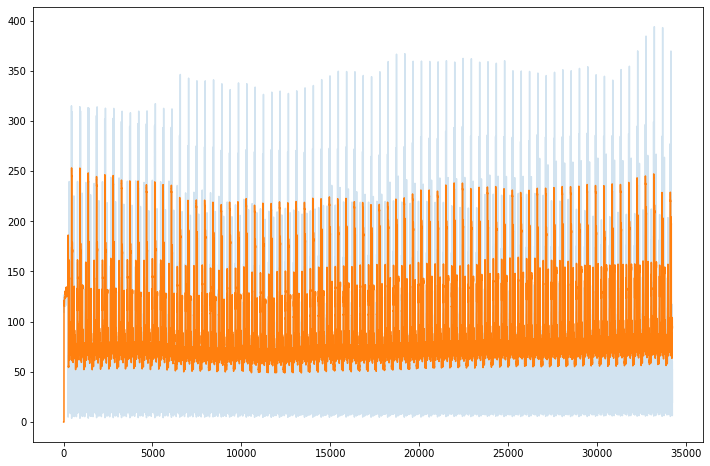

In [135]:
plt.figure(figsize=(12,8))

plt.plot(a['high'],label='High history',alpha=0.2)

plt.plot(a['bb_high'],label='bollinger bands high')


plt.show()

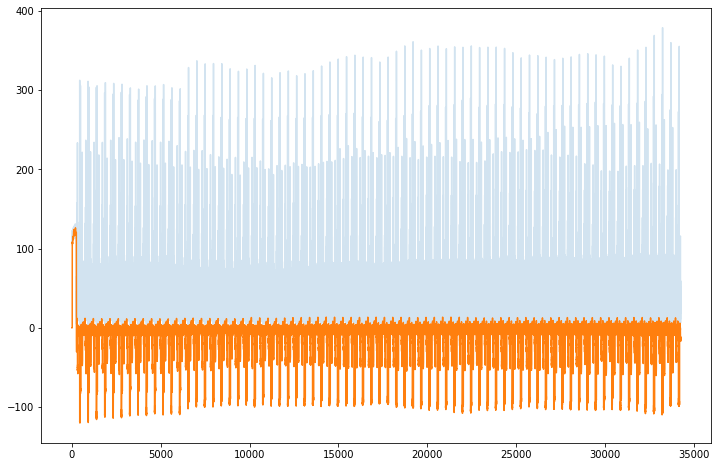

In [137]:
plt.figure(figsize=(12,8))
plt.plot(a['low'],label='Low history',alpha=0.2)
plt.plot(a['bb_low'],label='bollinger bands low')
plt.show()

<Figure size 864x576 with 0 Axes>

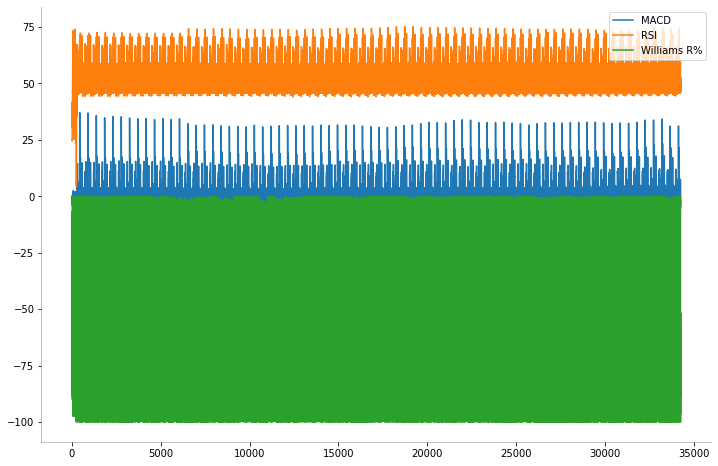

In [147]:
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
plt.plot(a['macd'],label='MACD')
plt.plot(a['rsi'],label='RSI')
plt.plot(a['william R%'],label='Williams R%')
 
plt.legend(loc='best')
plt.show()

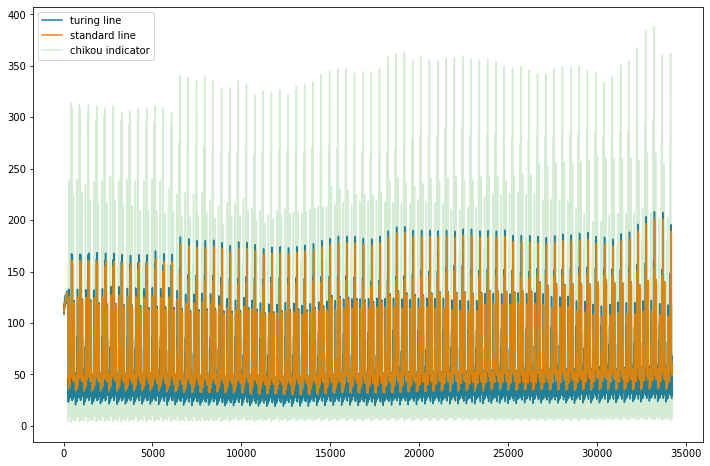

In [158]:
plt.figure(figsize=(12,8))
plt.plot(b['turing line'],label='turing line')
plt.plot(b['standard line'],label='standard line')
plt.plot(b['chikou_span'],label='chikou indicator',alpha=0.2)
 
plt.legend(loc='best')
plt.show()